In [3]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

In [14]:
plt.rcParams['figure.figsize'] = [10, 5]

# K MEAN

In [59]:
inf = 1e9
class K_mean():
    def __init__(self):
        # INITIALIZATION
        self.points = [
            (1,2),
            (3,3),
            (2,2),
            (8,8),
            (6,6),
            (7,7),
            (-3,-3),
            (-2,-4),
            (-7,-7)
        ]

        
    def dist(self, p1, p2):
        d = 0
        for i in range(len(p1)):
            d += (p1[i] - p2[i])**2
        return d**(0.5)

    
    def mean(self, points):
        x,y = [0,0]
        for p in points:
            x += p[0]
            y += p[1]
        x /= len(points)
        y /= len(points)
        return (x,y)

    
    def update(self, points):
        new_centroids = []
        for ps in points:
            new_centroids.append(self.mean(ps))

        return new_centroids
    
    
    def assign(self, centroids, points): 
        assigned_points = [ [] for i in range(len(centroids)) ]
        for p in points:
            min_dist = inf
            index = -1
            for i in range(len(centroids)):
                d = self.dist(centroids[i],p)
                if(d < min_dist):
                    index = i
                    min_dist = d
            assigned_points[index].append(p)
        return assigned_points
    
    
    def diff(self, c_old, c_new):
        ans = -inf
        for i in range(len(c_old)):
            d = abs(c_old[i][0] - c_new[i][0]) + abs(c_old[i][1] - c_new[i][1])
            ans = max(ans , d)
        return ans

    
    def scoring(self, centroids, points):
        d = 0
        out_d = 0
        for i, centroid in enumerate(centroids):
            for point in points[i]:
                d += kmean.dist(point, centroid) / len(points[i])
            if(i > 0):
                out_d += kmean.dist(centroids[i-1], centroids[i])
        return d, out_d / len(centroids)
    
    
    def fit(self, starting_points):
        centroids = starting_points
        epsilon = 1e-6
        changes = 10
        while( changes > epsilon ):
            assigned_points = self.assign(centroids,self.points)
            new_centroids = self.update(assigned_points)
            changes = self.diff(centroids, new_centroids)
            centroids = new_centroids

        return centroids, self.assign(centroids, self.points)

In [60]:
kmean = K_mean()
starting_points = [(3,3), (2,2), (-3,3)]
starting_points_2 = [(-3,-3), (2,2), (-7,-7)]

### T4

In [61]:
centroids, points = kmean.fit(starting_points)
for i in range(len(centroids)):
    print ("centroids {}".format(centroids[i]))
    print ("\t points: {}".format(points[i]))
print ("score:" ,kmean.scoring(centroids, points))

centroids (7.0, 7.0)
	 points: [(8, 8), (6, 6), (7, 7)]
centroids (2.0, 2.3333333333333335)
	 points: [(1, 2), (3, 3), (2, 2)]
centroids (-4.0, -4.666666666666667)
	 points: [(-3, -3), (-2, -4), (-7, -7)]
score: (4.423374641782709, 5.352990877840206)


### T5.

In [62]:
centroids, points = kmean.fit(starting_points_2)
for i in range(len(centroids)):
    print ("centroids {}".format(centroids[i]))
    print ("\t points: {}".format(points[i]))
print ("score:" ,kmean.scoring(centroids, points))

centroids (-2.5, -3.5)
	 points: [(-3, -3), (-2, -4)]
centroids (4.5, 4.666666666666667)
	 points: [(1, 2), (3, 3), (2, 2), (8, 8), (6, 6), (7, 7)]
centroids (-7.0, -7.0)
	 points: [(-7, -7)]
score: (4.133383806711511, 9.045955405702337)


In [63]:
%%html
<style>
table {float:left}
</style>

## T6.

|initialize|inside-distance|inter-distance|
|----------|---------------|--------------|
|First     |4.423374641782709|5.352990877840206|
|Second    |4.133383806711511|9.045955405702337|

If evaluatation criteria were inside-cluster distance and inter-cluster distance, the later initialization was better.

## OT1.
Four clusters may be the best in this situation.
It will maximize inter-cluster distance while keeping inside-cluster distance minimum.

# My heart will go on

In [4]:
### READ DATA
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url) #training set
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url) #test set

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# T7, T8, T9

In [5]:
### Handle missing value
# T7
train["Age"] = train["Age"].fillna(train["Age"].median())

# T8
train.loc[train["Embarked"] == "S", "Embarked"] = 0
train.loc[train["Embarked"] == "C", "Embarked"] = 1
train.loc[train["Embarked"] == "Q", "Embarked"] = 2
train["Embarked"] = train["Embarked"].fillna((train["Embarked"].mode())[0])

train.loc[train["Sex"] == "male", "Sex"] = 0
train.loc[train["Sex"] == "female", "Sex"] = 1
train["Sex"] = train["Sex"].fillna(train["Sex"].mode())
train["Pclass"] = train["Pclass"].fillna((train["Pclass"].mode())[0])

test["Age"] = test["Age"].fillna(test["Age"].median())
test.loc[test["Embarked"] == "S", "Embarked"] = 0
test.loc[test["Embarked"] == "C", "Embarked"] = 1
test.loc[test["Embarked"] == "Q", "Embarked"] = 2
test["Embarked"] = test["Embarked"].fillna((test["Embarked"].mode())[0])

test.loc[test["Sex"] == "male", "Sex"] = 0
test.loc[test["Sex"] == "female", "Sex"] = 1
test["Sex"] = test["Sex"].fillna(test["Sex"].mode())
test["Pclass"] = test["Pclass"].fillna((test["Pclass"].mode())[0])

In [6]:
def sigmoid(Z):
    return 1/(1 + np.exp(-Z))


def gradient(X, y, theta, alpha):
    Z = np.dot(X,theta)
    loss = y - sigmoid(Z)
    return theta + ( alpha * np.dot(X.T, loss) )


def predict(X, theta, threshold):
    Z = np.dot(X,theta)
    pred = sigmoid(Z)
    pred[pred < threshold] = 0
    pred[pred >= threshold] = 1
    return pred
    
    
def accuracy(pred, label):
    tp = np.array( pred == label, dtype=np.int).sum()
    return tp / len(label)

In [7]:
### Use PClass, Sex, Age,and Embarked as input features.
train_data = np.array(train[["Pclass","Sex","Age","Embarked"]].values, dtype=np.float)
train_label = np.array(train[["Survived"]].values, dtype=np.float)
test_data = np.array(test[["Pclass","Sex","Age","Embarked"]].values, dtype=np.float)
steps = 10000
alpha = 0.05

In [29]:
np.arange(0)

array([], dtype=int64)

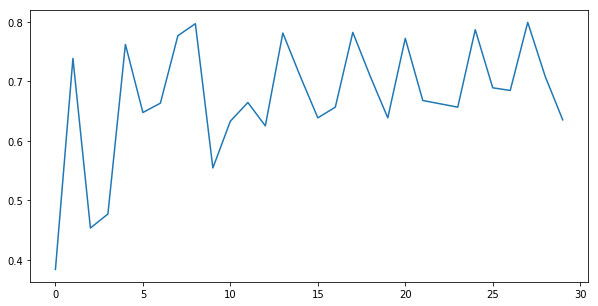

0.813692480359147


In [42]:
# Training
n,m = train_data.shape
ones = np.full((n,1), 1., dtype=np.float)
X_train = np.concatenate((ones, train_data), axis = 1) 
best_theta = []
best_acc = 0
threshold = 0.5

epoches = 30000


for r in range(1):
    theta = np.random.normal(loc=0, scale=1 ,size=(m+1,1))
    history = []
    for ep in range(epoches):
        theta = gradient(X_train, train_label, theta, alpha)
        pred = predict(X_train, theta, threshold)
        acc = accuracy(pred, train_label)        
        if(acc > best_acc):
            best_acc = acc
            best_theta = theta
        if( ep % 1000  == 0):
            history.append(acc)
            clear_output(wait=True)
            plt.plot(history)
            plt.show()
            plt.pause(0.5)

print (best_acc)

In [43]:
### Test
m = test_data.shape[0]
ones = np.full((m,1), 1., dtype=np.float)
X_test = np.concatenate((ones, test_data), axis = 1) 
threshold = 0.5
Z = np.dot(X_test,best_theta)
pred = np.round(sigmoid(Z))
df = pd.DataFrame(test["PassengerId"])
df2 = pd.DataFrame(pred, columns=["Survived"], dtype=np.int)
out = df.join(df2)
out.to_csv("pred.csv", index=False)

/home/burin/.env/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


# T10

![title](score.png)